In [1]:
import pickle
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

MODEL_FOLDER = os.environ.get('MODEL_FOLDER', 'trained_gan')
DATA_FOLDER = os.environ.get('DATA_FOLDER')
PLOTS_FOLDER = os.environ.get('PLOTS_FOLDER')



def load_artifact(model_name, obj_name, group_name='data'):
    model_artifact_path = DATA_FOLDER + '/' + model_name + '/' + group_name
    with open(model_artifact_path + '/' + obj_name + '.pkl', "rb") as f:
        return pickle.load(f)


def load_artifacts(model_name, group_name='data'):
    model_artifact_path = DATA_FOLDER + '/' + model_name + '/' + group_name
    files = os.listdir(model_artifact_path)
    a = []
    for fname in files:
        with open(os.path.join(model_artifact_path, fname), "rb") as f:
            a.append(pickle.load(f))
    return a


In [2]:
sample_name = 'lat2_2.l2_n3_v2'
metrics_dfs = load_artifacts(sample_name, 'metrics_dfs')
metrics_df = pd.concat(metrics_dfs)

Text(0.5, 1.0, '2D latend space - first dim sweep - Standard Deviation')

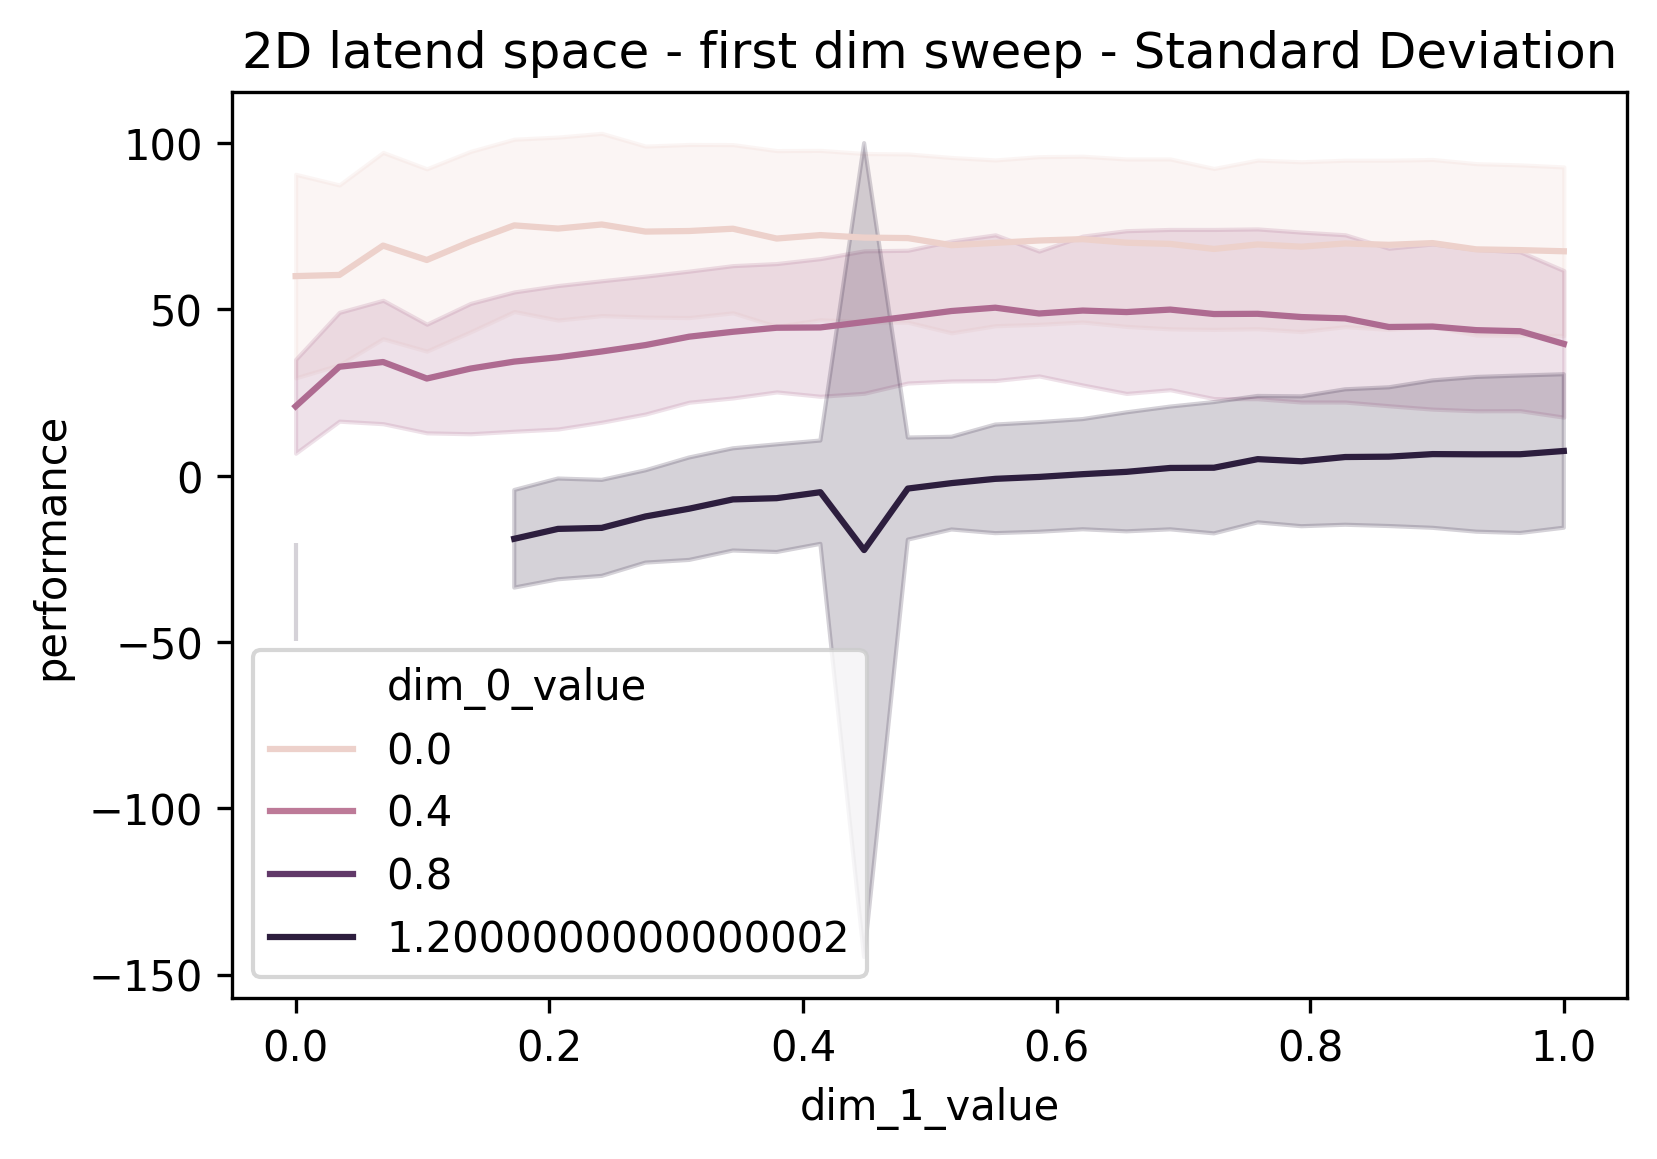

In [3]:
line_df = metrics_df[metrics_df['dim_0_idx'].isin([0,14,29])]
plt.figure(figsize=(6,4), dpi=300)
sns.lineplot(data=line_df, x='dim_1_value', y='performance', hue='dim_0_value', ci='sd') \
    .set_title('2D latend space - first dim sweep - Standard Deviation')

Text(0.5, 1.0, '2D latend space - first dim sweep - Mean Conf Interval')

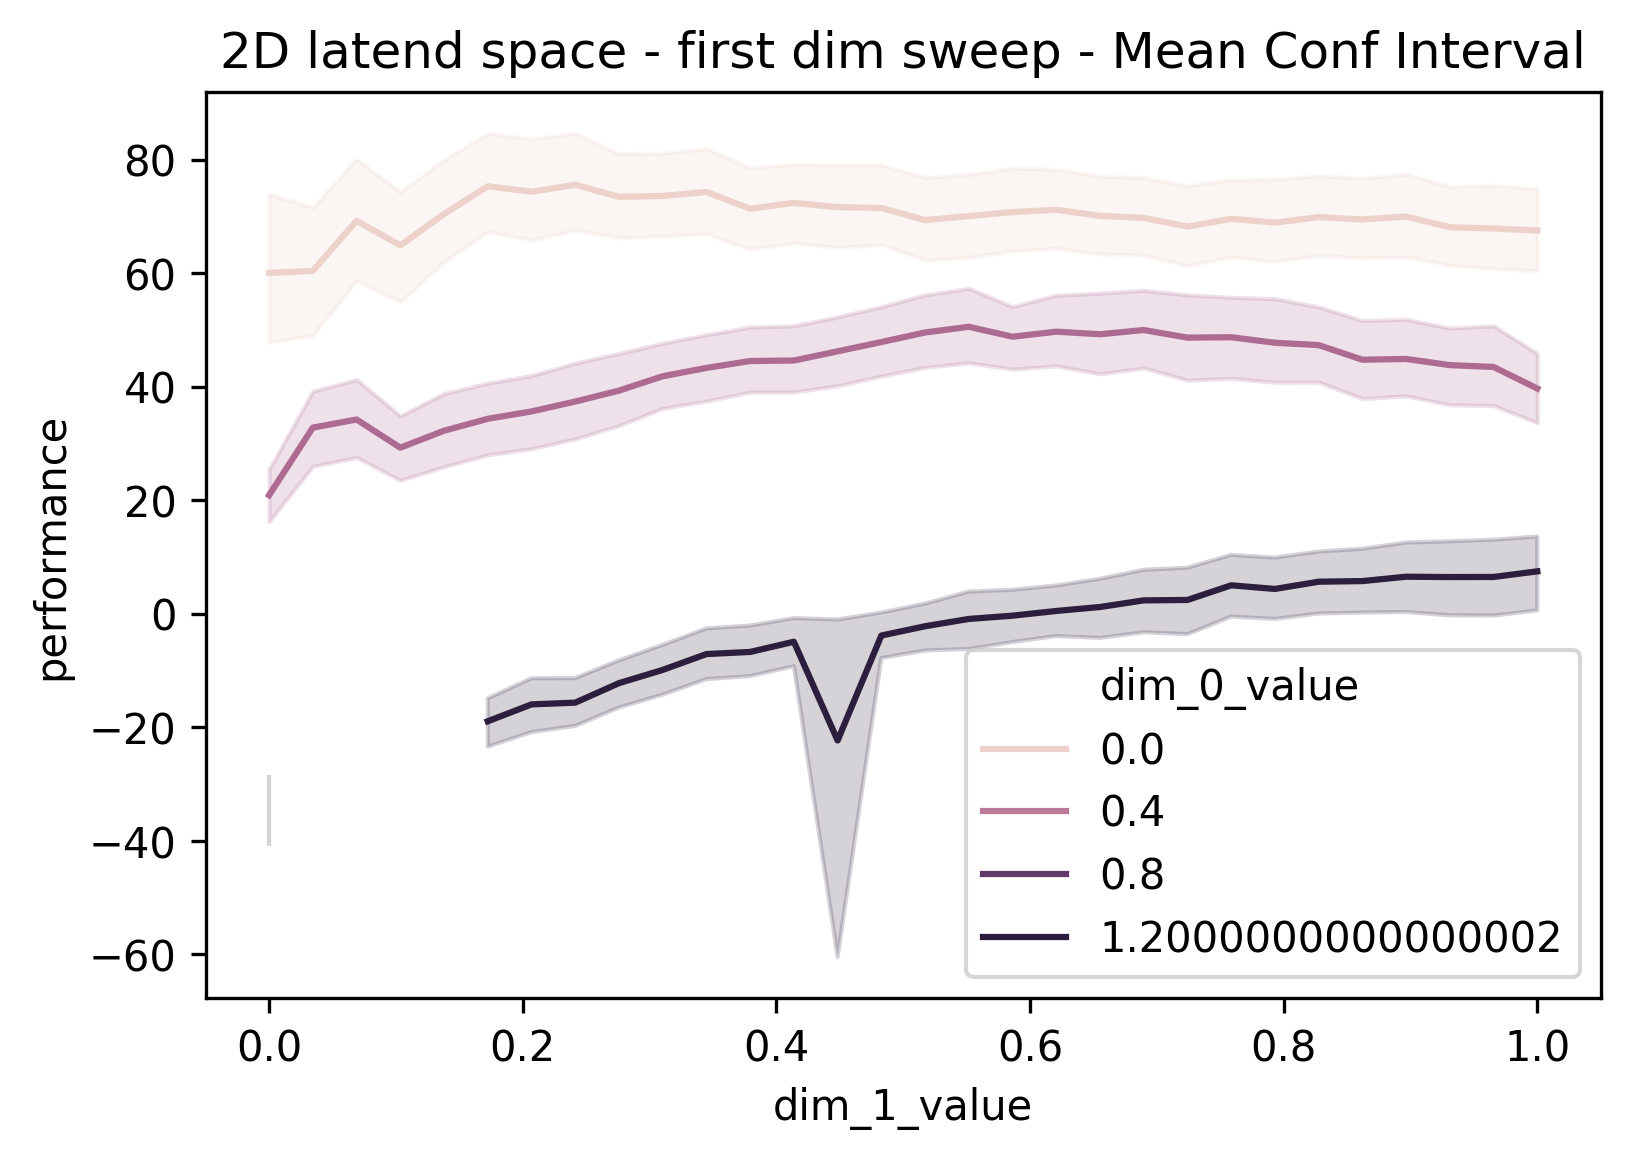

In [4]:
plt.figure(figsize=(6,4), dpi=300)
sns.lineplot(data=line_df, x='dim_1_value', y='performance', hue='dim_0_value', ci=95) \
    .set_title('2D latend space - first dim sweep - Mean Conf Interval')

Text(0.5, 1.0, '2D latend space - first dim sweep - Noise Dimensions Seperately')

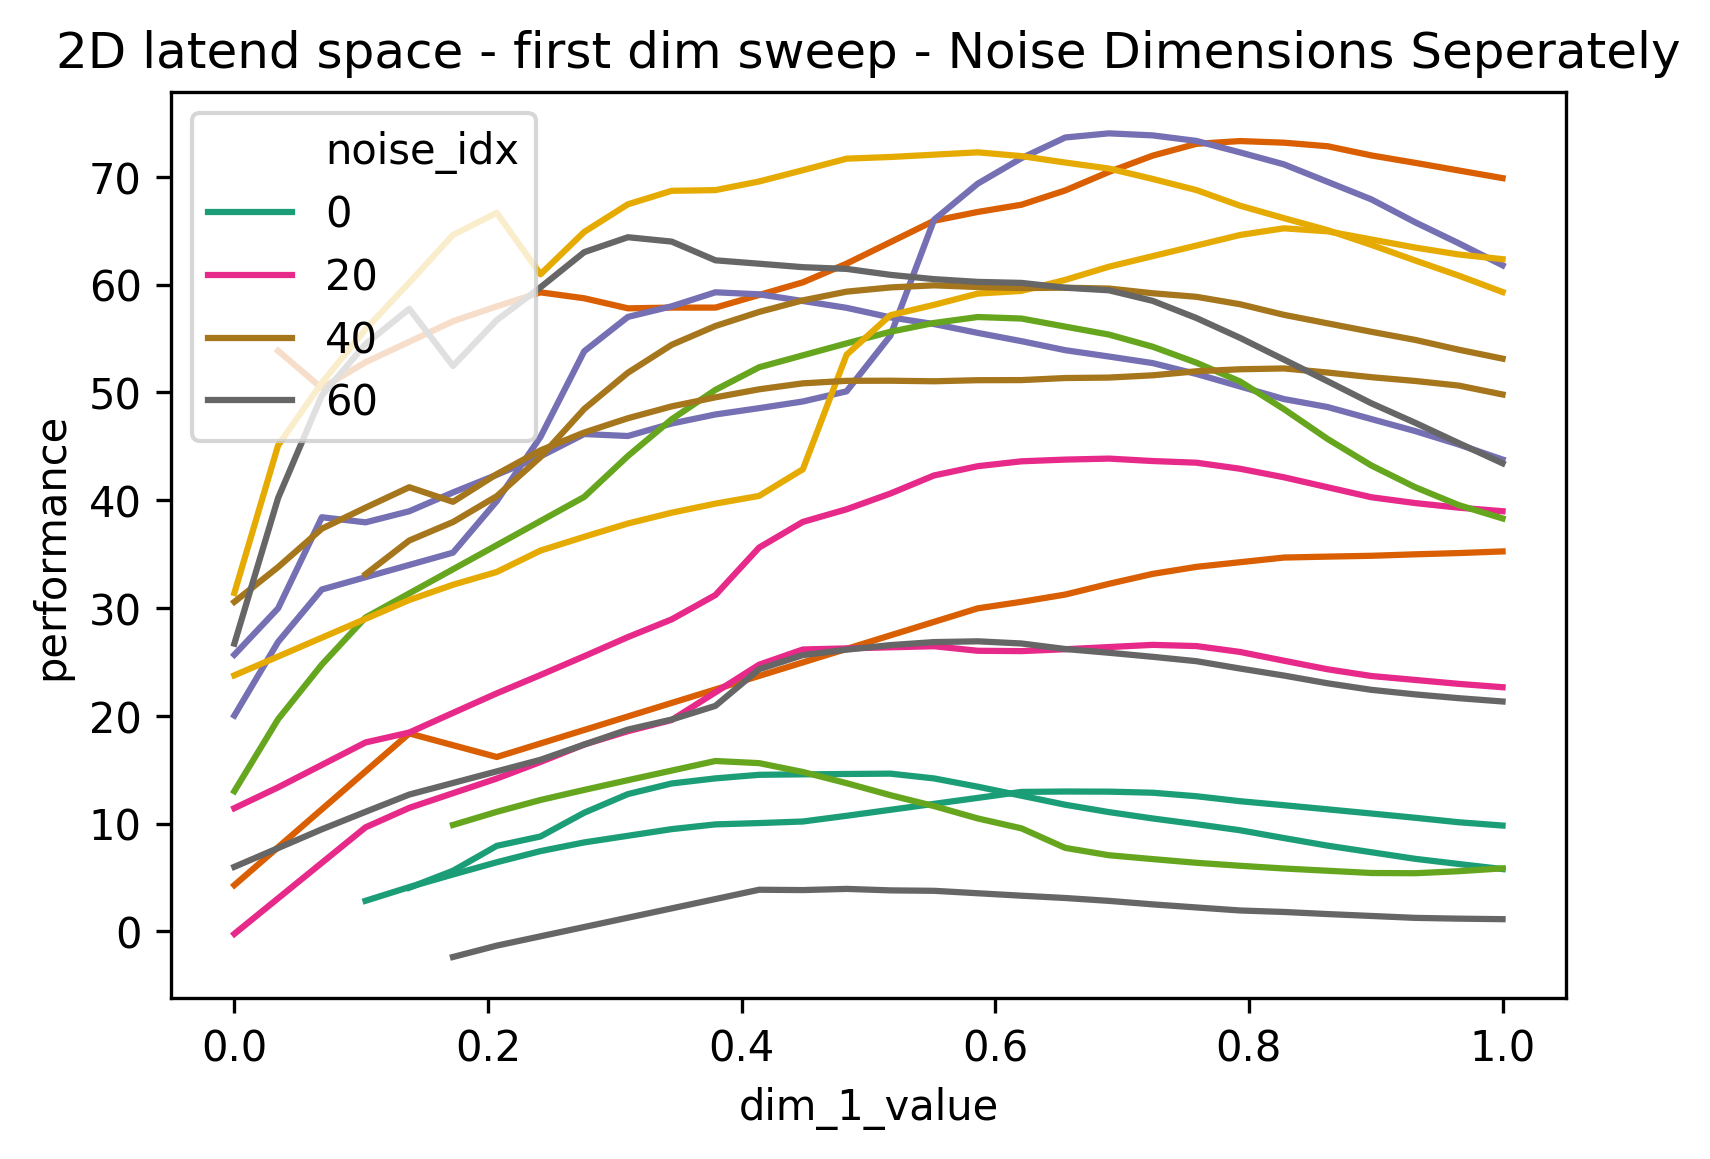

In [5]:
line_df = metrics_df[metrics_df['dim_0_idx'].isin([14])]
line_df = line_df[line_df['noise_idx'] % 3 == 0]
plt.figure(figsize=(6,4), dpi=300)
sns.lineplot(data=line_df, x='dim_1_value', y='performance', hue='noise_idx', palette='Dark2') \
    .set_title('2D latend space - first dim sweep - Noise Dimensions Seperately')

Text(0.5, 1.0, '2D latend space - second dim sweep - Standard Deviation')

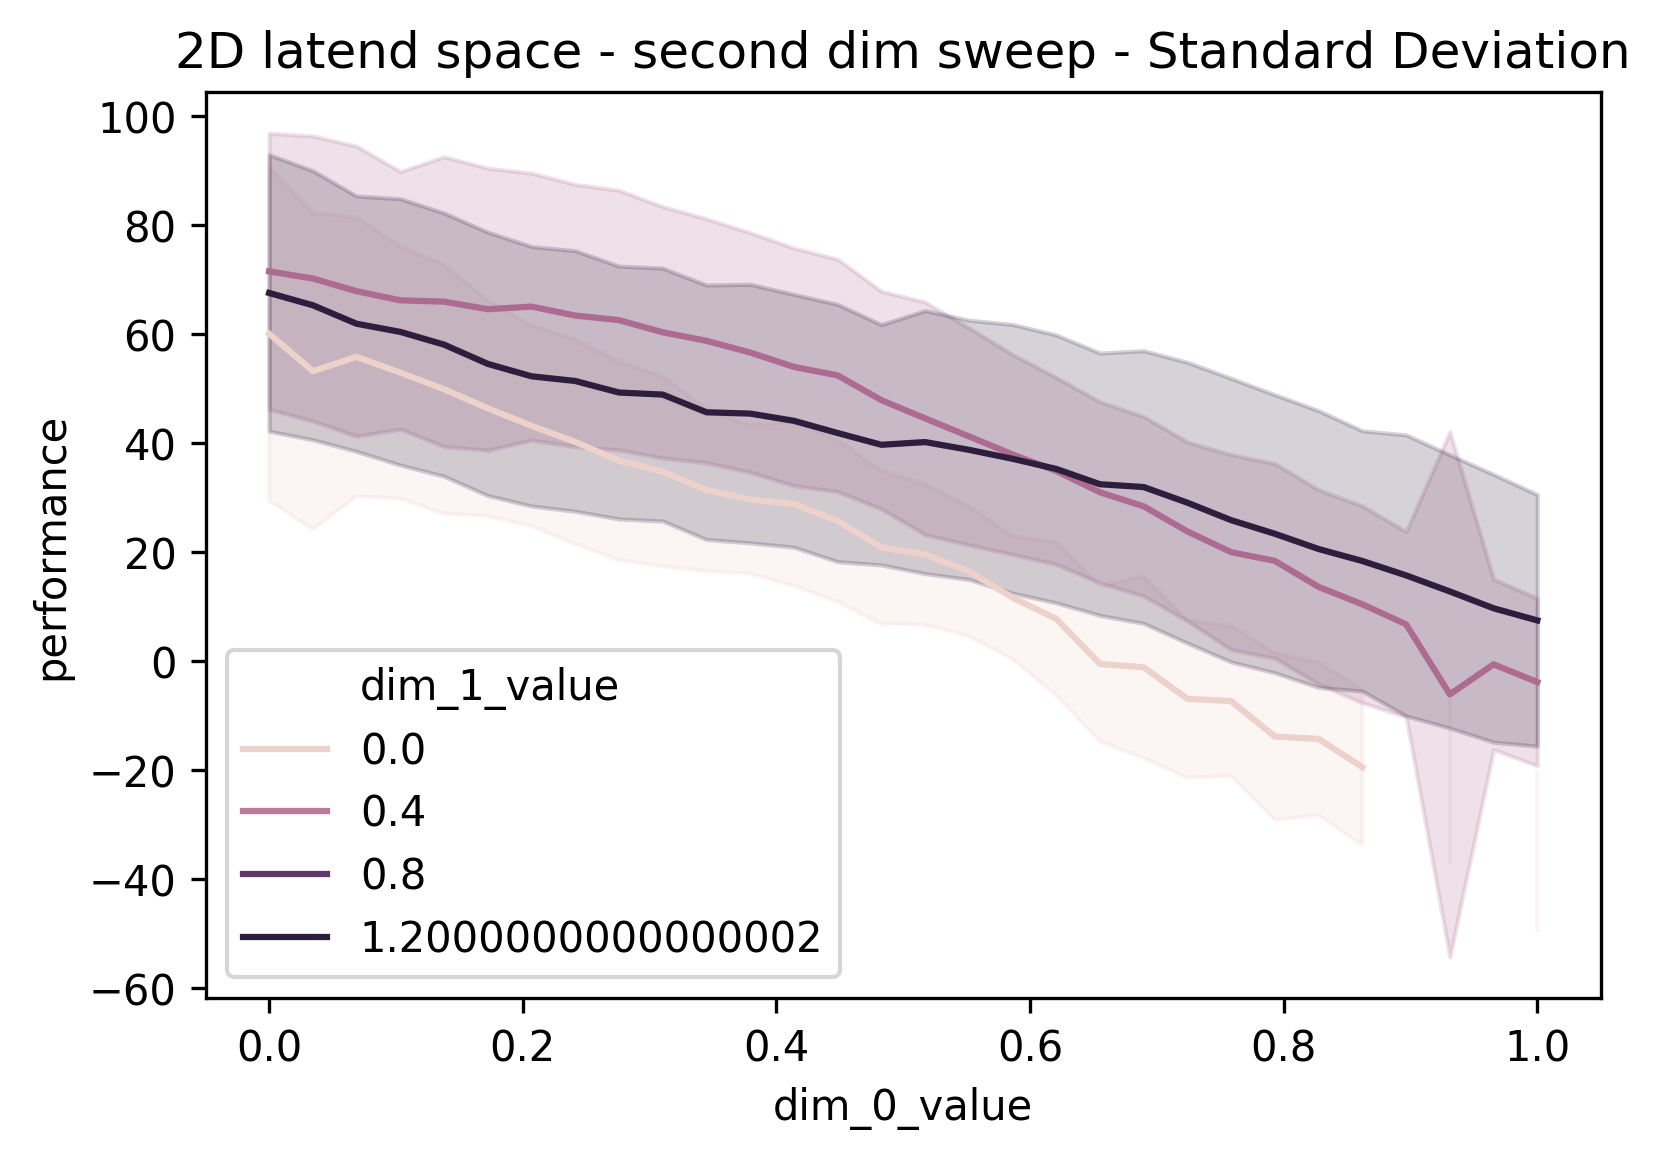

In [6]:
line_df = metrics_df[metrics_df['dim_1_idx'].isin([0,14,29])]
plt.figure(figsize=(6,4), dpi=300)
sns.lineplot(data=line_df, x='dim_0_value', y='performance', hue='dim_1_value', ci='sd') \
    .set_title('2D latend space - second dim sweep - Standard Deviation')

Text(0.5, 1.0, '2D latend space - second dim sweep - Mean Conf Interval')

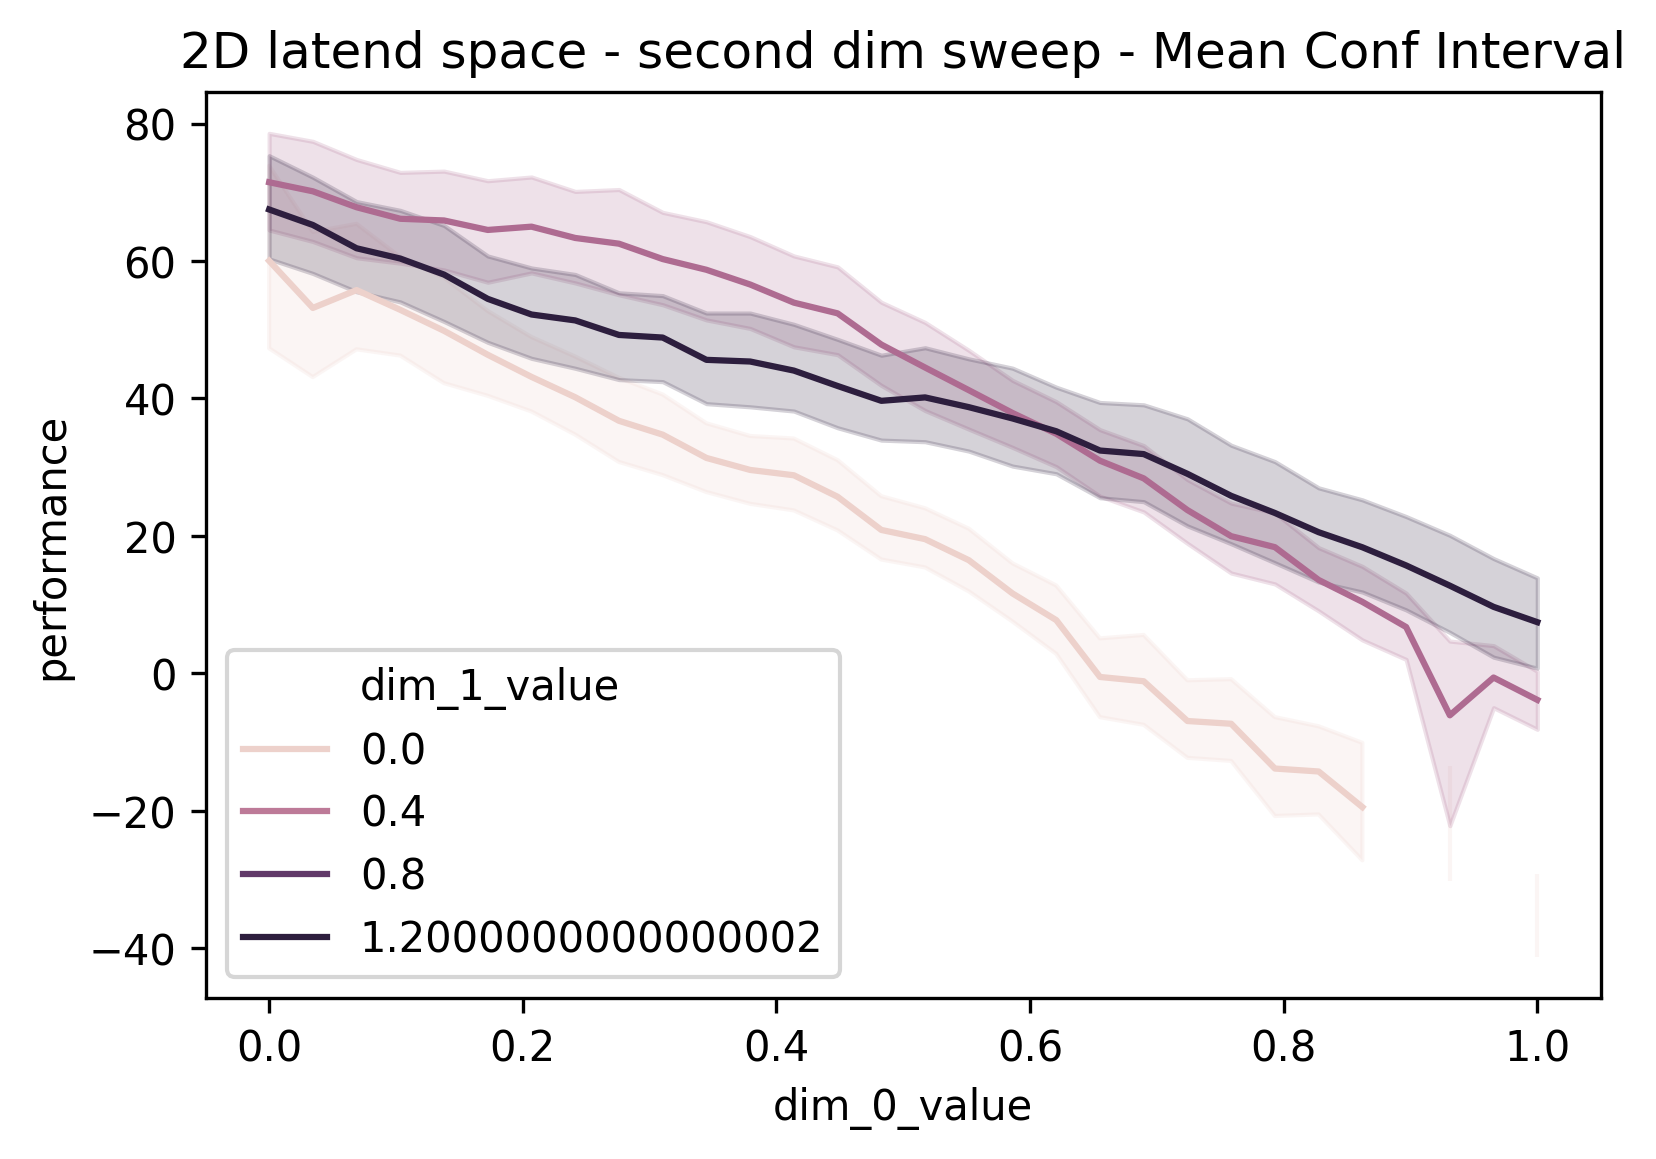

In [7]:
plt.figure(figsize=(6,4), dpi=300)
sns.lineplot(data=line_df, x='dim_0_value', y='performance', hue='dim_1_value', ci=95) \
    .set_title('2D latend space - second dim sweep - Mean Conf Interval')

Text(0.5, 1.0, '2D latend space - second dim sweep - Noise Dimensions Seperately')

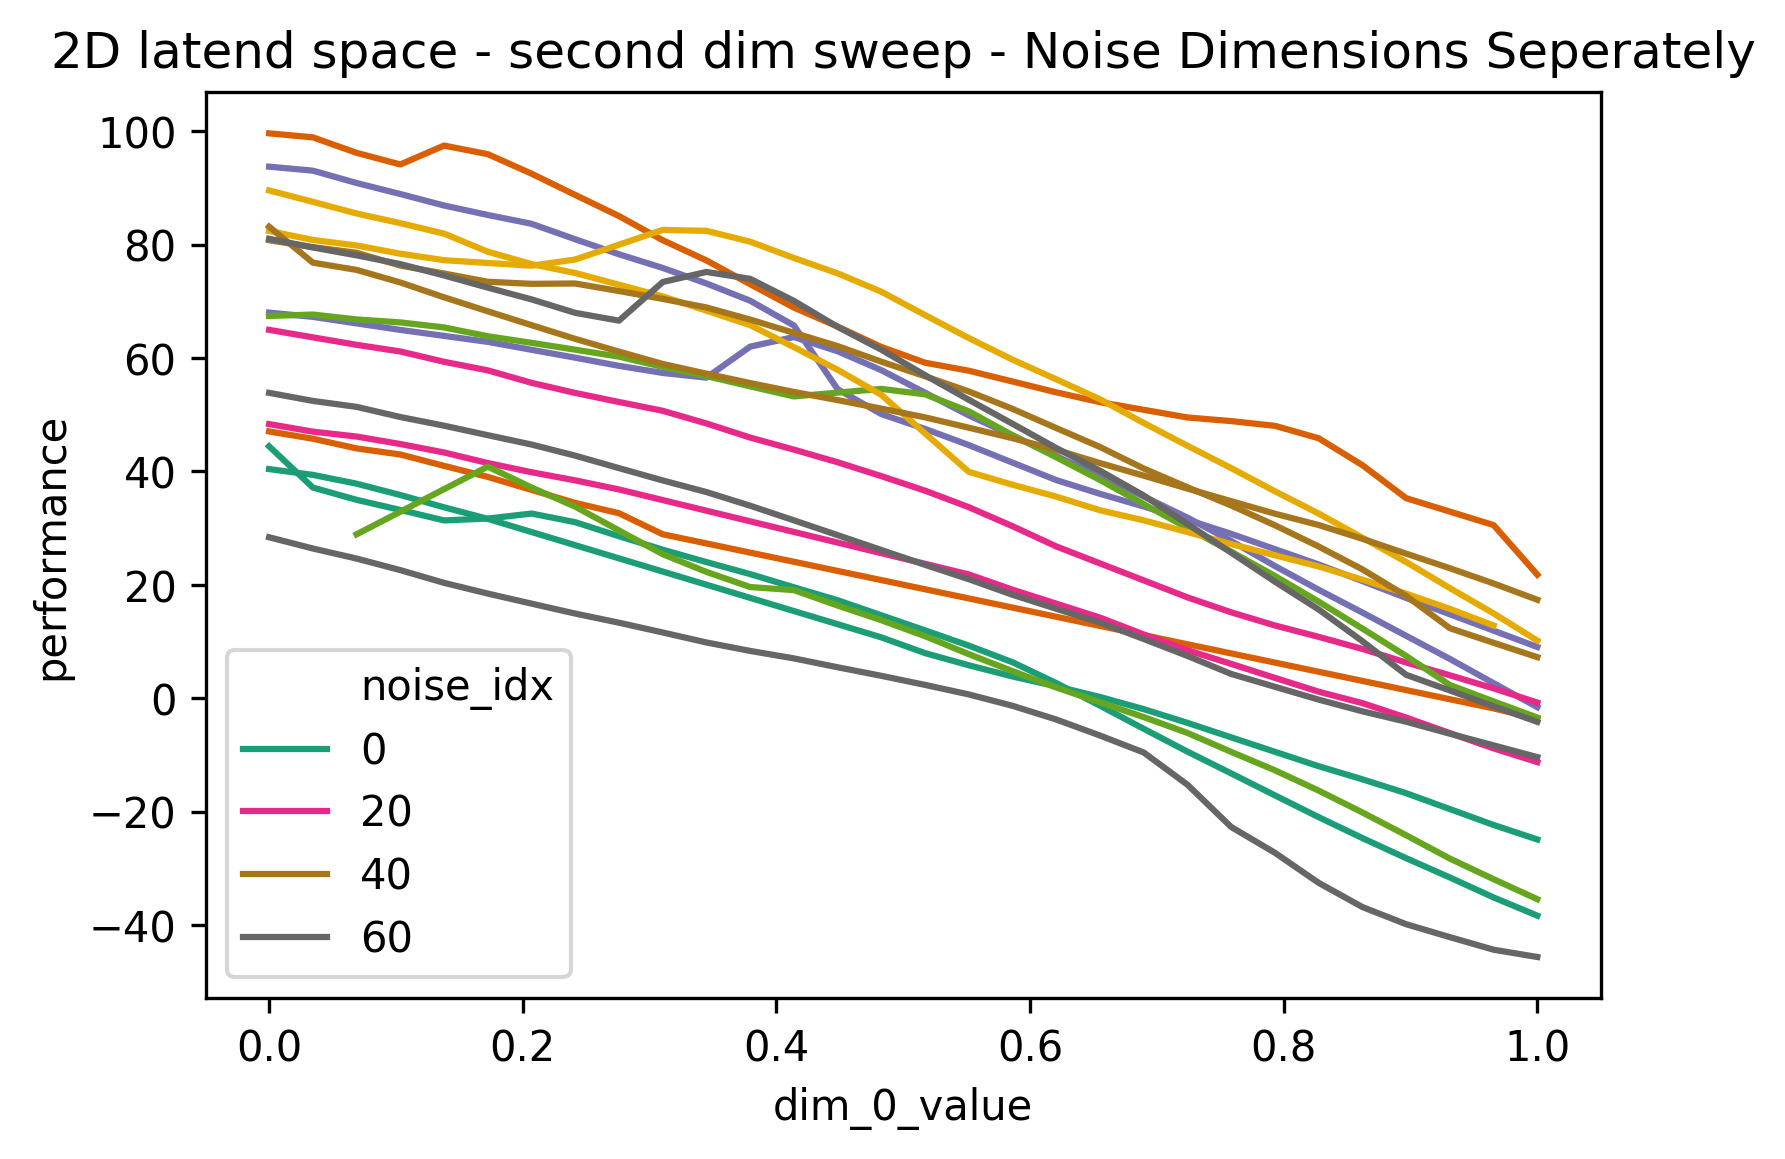

In [8]:
line_df = metrics_df[metrics_df['dim_1_idx'].isin([14])]
line_df = line_df[line_df['noise_idx'] % 3 == 0]
plt.figure(figsize=(6,4), dpi=300)
sns.lineplot(data=line_df, x='dim_0_value', y='performance', hue='noise_idx', palette='Dark2') \
    .set_title('2D latend space - second dim sweep - Noise Dimensions Seperately')

In [9]:
sample_name = 'lat4.line1'
metrics2_dfs = load_artifacts(sample_name, 'metrics_dfs')
metrics2_df = pd.concat(metrics2_dfs)

In [10]:
w1 = ((metrics2_df['dim_0_value'] == 0.5)
  & (metrics2_df['dim_1_value'] == 0.5)
  & (metrics2_df['dim_2_value'] == 0.5))
metrics2_df.loc[w1, 'value'] = metrics2_df.loc[w1, 'dim_3_value']
metrics2_df.loc[w1, 'rline_idx'] = 'dim_3_1'
w2 = ((metrics2_df['dim_0_value'] == 0)
  & (metrics2_df['dim_1_value'] == 0.5)
  & (metrics2_df['dim_2_value'] == 0.5))
metrics2_df.loc[w2, 'value'] = metrics2_df.loc[w2, 'dim_3_value']
metrics2_df.loc[w2, 'rline_idx'] = 'dim_3_2'
w3 = ((metrics2_df['dim_0_value'] == 0.5)
  & (metrics2_df['dim_1_value'] == 0.5)
  & (metrics2_df['dim_2_value'] == 0))
metrics2_df.loc[w3, 'value'] = metrics2_df.loc[w3, 'dim_3_value']
metrics2_df.loc[w3, 'rline_idx'] = 'dim_3_3'



w21 = ((metrics2_df['dim_0_value'] == 0.5)
  & (metrics2_df['dim_3_value'] == 0.5)
  & (metrics2_df['dim_2_value'] == 0.5))
metrics2_df.loc[w21, 'value'] = metrics2_df.loc[w21, 'dim_1_value']
metrics2_df.loc[w21, 'rline_idx'] = 'dim_1_1'
w22 = ((metrics2_df['dim_0_value'] == 0)
  & (metrics2_df['dim_3_value'] == 0.5)
  & (metrics2_df['dim_2_value'] == 0.5))
metrics2_df.loc[w22, 'value'] = metrics2_df.loc[w22, 'dim_1_value']
metrics2_df.loc[w22, 'rline_idx'] = 'dim_1_2'
w23 = ((metrics2_df['dim_0_value'] == 0.5)
  & (metrics2_df['dim_3_value'] == 0.5)
  & (metrics2_df['dim_2_value'] == 0))
metrics2_df.loc[w23, 'value'] = metrics2_df.loc[w23, 'dim_1_value']
metrics2_df.loc[w23, 'rline_idx'] = 'dim_1_3'

Text(0.5, 1.0, '4D latend space - second / fourth dim sweep - Standard Deviation')

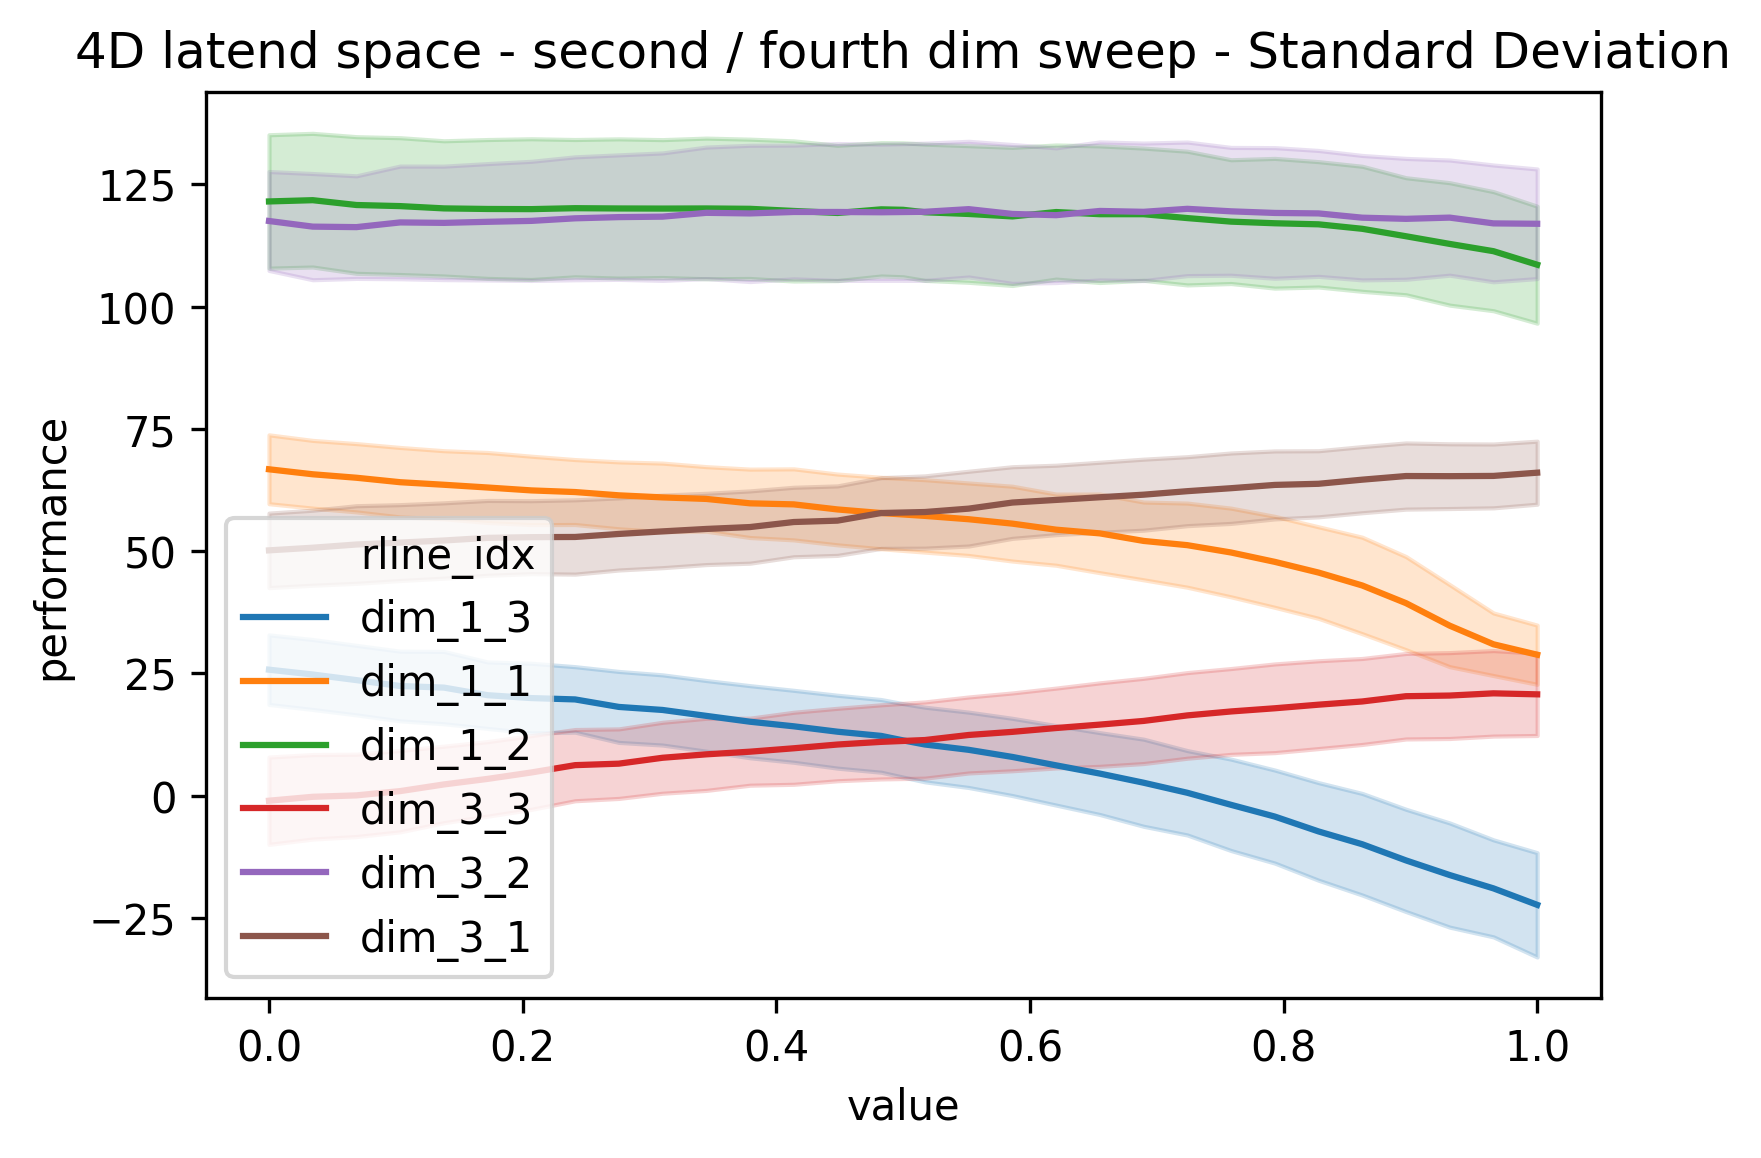

In [11]:
line_df = metrics2_df[w1 | w2 | w3 | w21 | w22 | w23]
plt.figure(figsize=(6,4), dpi=300)
sns.lineplot(data=line_df, x='value', y='performance', hue='rline_idx', ci='sd') \
    .set_title('4D latend space - second / fourth dim sweep - Standard Deviation')